<font color="magenta" size=7>Source Code

This is the source code that runs the `spikesort_easy` application.

<font color="red">This code is based on [this repository](https://github.com/flatironinstitute/spikeforest2)

# <font color="red">Siddish

<font color="red"> Finish this notebook so that you can create a functioning application inside the `Welcome to spikesort_easy` notebook.

# Notebook Setup

## Import Stuff

In [2]:
import kachery as ka
import matplotlib.pyplot as plt

import os
import subprocess
import sys
import numpy as np
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
#do things to get braingeneers data
#install("git+https://github.com/braingeneers/braingeneerspy.git")
#install("matplotlib")
import hither_sf as hither
from spikeforest2 import sorters
import matplotlib
import braingeneers.datasets_electrophysiology
import spikeinterface.extractors as se #for mda conversion only
import spiketoolkit as st
import braingeneers
from braingeneers import datasets_electrophysiology as ephys
import numpy as np
import json
import spikeforest2_utils
from spikeforest2_utils import AutoRecordingExtractor, MdaRecordingExtractor
import hither_sf as hither
import kachery as ka
import io
import sys
spikeforest2_utils.__version__=1.0

In /opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

## Create Directories

In [3]:
folders = !ls
if "kach_dir_pi" not in folders:
    !mkdir kach_dir_pi
    !touch kach_dir_pi/raw.mda

current_dir = ! pwd
kach_dir = current_dir[0] + "/"+"kach_dir_pi"+"/"

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
kach_dir

'/home/jovyan/Projects/nicos_spikesort/11-05-experiment_SuiteSort/kach_dir_pi/'

# <font color="blue">Choose Experiment, time range, channels 

## <font color="blue">choose time range, experiment name, experiment num

In [5]:
fname = os.environ['KACHERY_STORAGE_DIR']=kach_dir
batch_uuid = '2020-11-05-e-UCSF-axionplate' 
experiment_num= 2 #arpitha make this a button to choose exp num
start = 0 #arpitha, sliders here for start minutes
stop = None #and end minutes
#recording_path = 'sha1://961f4a641af64dded4821610189f808f0192de4d/SYNTH_MEAREC_TETRODE/synth_mearec_tetrode_noise10_K10_C4/002_synth.json'

## view other experiment numbers in the same batch

In [6]:
try:
    for num in range(100):
        print("Below is experiment number ", num)
        experiment = braingeneers.datasets_electrophysiology.load_experiment(batch_uuid, num)
        print(experiment.keys())
        experiment["notes"]
except:
    print("these are the first 100 experiments")

Below is experiment number  0
Full path for PRP: https://s3.nautilus.optiputer.net/braingeneers/ephys/2020-11-05-e-UCSF-axionplate/derived/raspi-6well-neuron-2020-11-05-15-46-09.json
dict_keys(['version', 'name', 'notes', 'timestamp', 'hardware', 'sample_rate', 'offset', 'scaler', 'units', 'num_channels', 'channels', 'blocks'])
Below is experiment number  1
Full path for PRP: https://s3.nautilus.optiputer.net/braingeneers/ephys/2020-11-05-e-UCSF-axionplate/derived/raspi-6well-neuron-2020-11-05-15-55-40.json
dict_keys(['version', 'name', 'notes', 'timestamp', 'hardware', 'sample_rate', 'offset', 'scaler', 'units', 'num_channels', 'channels', 'blocks'])
Below is experiment number  2
Full path for PRP: https://s3.nautilus.optiputer.net/braingeneers/ephys/2020-11-05-e-UCSF-axionplate/derived/raspi-6well-neuron-ch6active-2020-11-05-17-19-47.json
dict_keys(['version', 'name', 'notes', 'timestamp', 'hardware', 'sample_rate', 'offset', 'scaler', 'units', 'num_channels', 'channels', 'blocks'])


## <font color="blue">choose channels

In [7]:
selected_channels=[5]

In [8]:
len(selected_channels)

1

## load data, time array (seconds), and sampling freq

In [9]:
X, t, fs = ephys.load_blocks(batch_uuid, experiment_num, start=start, stop=stop)

X = X.T #spikeinterface wants it MxN (channel number by time)
X.shape

Full path for PRP: https://s3.nautilus.optiputer.net/braingeneers/ephys/2020-11-05-e-UCSF-axionplate/derived/raspi-6well-neuron-ch6active-2020-11-05-17-19-47.json
Loading file Raspi... start: 0  stop: None


(32, 1829149)

In [10]:
X=X[selected_channels,:-1] #last frame may be incomplete and needs to be removed

In [11]:
X.shape

(1, 1829148)

In [12]:
print("this is sampling Freq: ", fs)
print("this is total time: ", X.shape[1]/fs/60, " minutes")

this is sampling Freq:  14500
this is total time:  2.1024689655172413  minutes


# Manually trim time range of recording ( if no blocks )

In [13]:
X.shape

(1, 1829148)

In [14]:
# start_min=4
# end_min=7
# X=X[:, start_min*fs*60:end_min*fs*60]

In [15]:
X.shape

(1, 1829148)

## <font color="blue">optionally (ideally): apply geometry for locations of electrodes

In [16]:
geom = np.zeros((X.shape[0],2))


In [17]:
X.shape

(1, 1829148)

In [18]:
type(X)

numpy.ndarray

In [19]:
print(geom)

[[0. 0.]]


In [20]:
#X.shape
#X[1:10,1:10]
print("minutes = ", X.shape[1]/fs/60)
#print("expected minutes =", stop-start)

minutes =  2.1024689655172413


In [21]:
if X.shape[0] == 2 :
    geom = np.array([[0.0,0.0],[0.0,1.0]])
    print("only two channels, so Geom always two points 1 unit apart.")

In [22]:
geom.shape #the 2d locations in space of each channel on the recording device

(1, 2)

# Create "Recording" for spikeForest and Filter recording

In [23]:
recording=se.NumpyRecordingExtractor(
    timeseries=X,
    geom=geom,
    sampling_frequency=fs
)

In [24]:
#recording = st.preprocessing.bandpass_filter(recording, freq_min=300, freq_max=6000)

In [25]:
fname

'/home/jovyan/Projects/nicos_spikesort/11-05-experiment_SuiteSort/kach_dir_pi/'

raw_path = ka.store_file(fname  + 'raw.mda')

kach_dir_files = ! ls kach_dir
if "geom.csv" not in kach_dir_files :
    ! touch kach_dir/geom.csv

obj = dict(
    raw=raw_path,
    params=ka.load_object(fname + 'params.json'),
    geom=np.genfromtxt(ka.load_file(fname + 'geom.csv'), delimiter=',').tolist()
)

obj['self_reference'] = ka.store_object(obj, basename='{}.json'.format(label))
print(obj['self_reference'])
with open(output_fname, 'w') as f:
    json.dump(obj, f, indent=4)

In [26]:
!echo 

In [27]:
kach_dir

'/home/jovyan/Projects/nicos_spikesort/11-05-experiment_SuiteSort/kach_dir_pi/'

In [28]:
from spikeextractors import MdaRecordingExtractor as mre
write_rec = mre.write_recording(recording=recording, save_path=kach_dir, params=dict(), raw_fname='raw.mda', params_fname='params.json',
                         geom_fname='geom.csv', dtype=None, chunk_size=None, chunk_mb=500, verbose=False)

In [29]:
write_rec

In [30]:
def register_recording(*, fname, recording, output_fname, label):
            raw_path = ka.store_file(fname  + 'raw.mda')
            obj = dict(
                raw=raw_path,
                params=ka.load_object(fname + 'params.json'),
                geom=geom.tolist()
            )
            obj['self_reference'] = ka.store_object(obj, basename='{}.json'.format(label))

            with open(output_fname, 'w') as f: json.dump(obj, f, indent=4)
            return obj['self_reference']
            
            

In [31]:
recording_path =  register_recording( recording=recording, fname=kach_dir, output_fname=fname+'new_recording.json', label='new_recording')

# <font color="black"> Sort

In [32]:
# dummy dataset courtesy of spikeforest's example 
#recording_path = 'sha1://961f4a641af64dded4821610189f808f0192de4d/SYNTH_MEAREC_TETRODE/synth_mearec_tetrode_noise10_K10_C4/002_synth.json' 


In [33]:
with ka.config(fr='default_readonly'):
    #with hither.config(cache='default_readwrite'):
        with hither.config(container='default'):
            result = sorters.spykingcircus.run(
                    recording_path=recording_path,
                    sorting_out=hither.File(),
                    detect_threshold=3
                    )
            print("recording out path: ", recording_path)
            print("sorting out path: ",result.outputs.sorting_out)
            sorting_path = str(result.outputs.sorting_out)

print(result.outputs.sorting_out)


/opt/conda/lib/python3.8/site-packages/kachery/_update_config_repos.py:39: ResourceWarning: unclosed file <_io.BufferedReader name=46>
  _pull_git_repo(path=config_repo_path + '/repo')
/opt/conda/lib/python3.8/site-packages/kachery/_update_config_repos.py:39: ResourceWarning: unclosed file <_io.BufferedReader name=48>
  _pull_git_repo(path=config_repo_path + '/repo')


===== Hither: running [spykingcircus] in container: docker://magland/sf-spykingcircus:0.9.7
#############################################################

                #!/bin/bash

                exec docker run --name lgFrDjpl_spykingcircus -i  \
                    -v /etc/localtime:/etc/localtime:ro \
                    -v /etc/passwd:/etc/passwd -u `id -u`:`id -g` \
                    -v $KACHERY_STORAGE_DIR:/kachery-storage \
                    -v /home/jovyan/Projects/nicos_spikesort/11-05-experiment_SuiteSort/kach_dir_pi/tmp/tmp_hither_run_in_container_spykingcircus_q_rnw5_4:/run_in_container \
                    -v /tmp:/tmp \
                    -v $HOME:$HOME \
                    -v /home/jovyan/Projects/nicos_spikesort/11-05-experiment_SuiteSort/kach_dir_pi/tmp/tmp_hither_run_in_container_spykingcircus_q_rnw5_4/outputs:/outputs \
                    magland/sf-spykingcircus:0.9.7 \
                    bash /run_in_container/run.sh
                
##################

In [34]:
sorting_out_short = sorting_path[12:-1]

print("This is the new short path for the sorting: ",sorting_out_short)

This is the new short path for the sorting:  /home/jovyan/Projects/nicos_spikesort/11-05-experiment_SuiteSort/kach_dir_pi/sha1/2a/68/de/2a68de2a47c62ec229a4b41a9d23373dea9b542e


In [35]:
from spikeforest2_utils import AutoRecordingExtractor, AutoSortingExtractor
import kachery as ka

universal_sorting_path = ka.store_file(sorting_out_short)

recording = AutoRecordingExtractor(recording_path, download=False)


In [36]:
sorting_true = AutoSortingExtractor(universal_sorting_path)

In [37]:
# Now you can access the recording using the SpikeInterface API
# For example, print the electrode locations and unit IDs
print(recording.get_channel_locations())
print(sorting_true.get_unit_ids())

[[0. 0.]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [38]:
import pickle

In [39]:
import spikeinterface.widgets as sw

# Make Plots

In [40]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)



/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


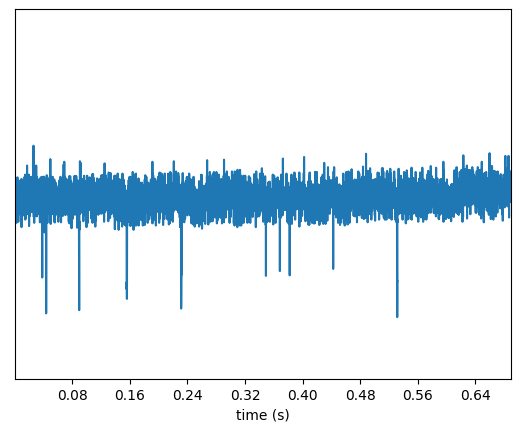

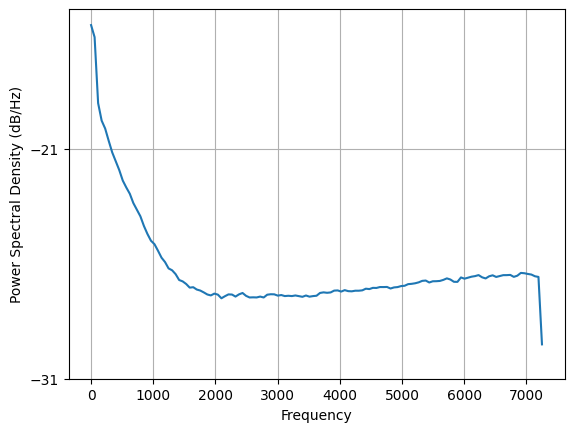

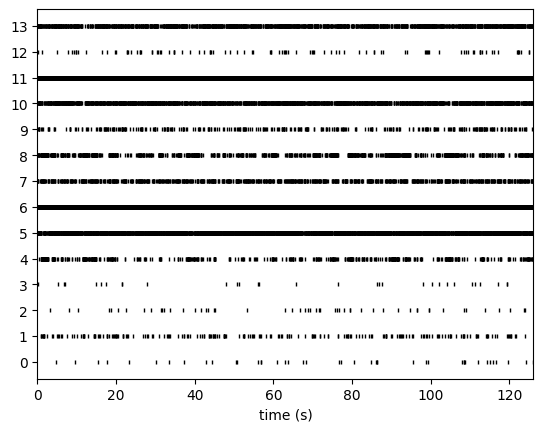

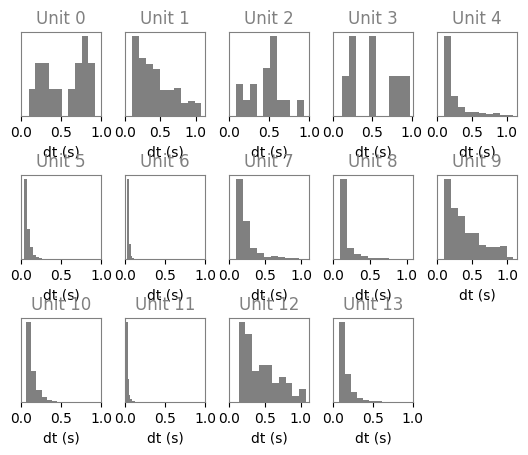

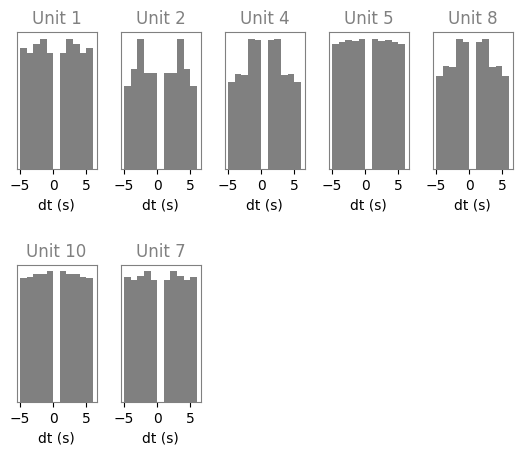

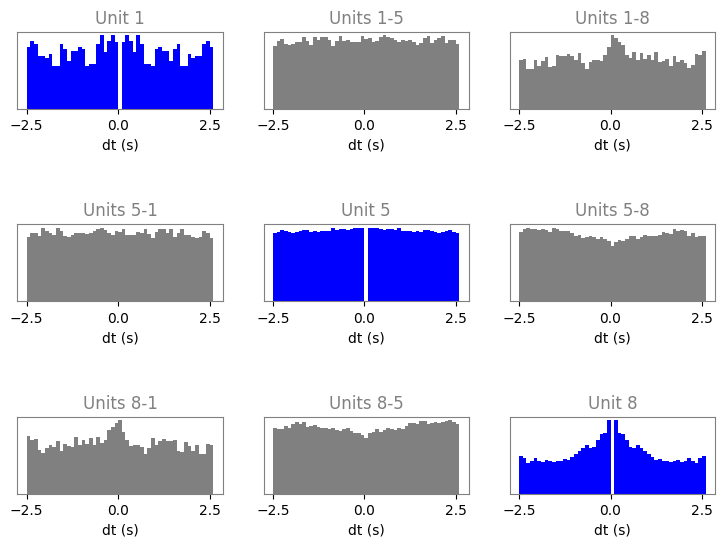

{'max_spikes_per_unit': 100}


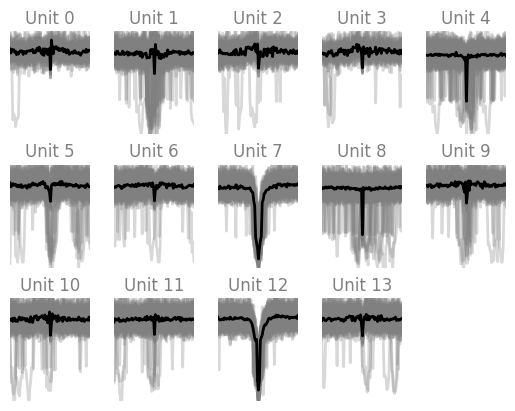

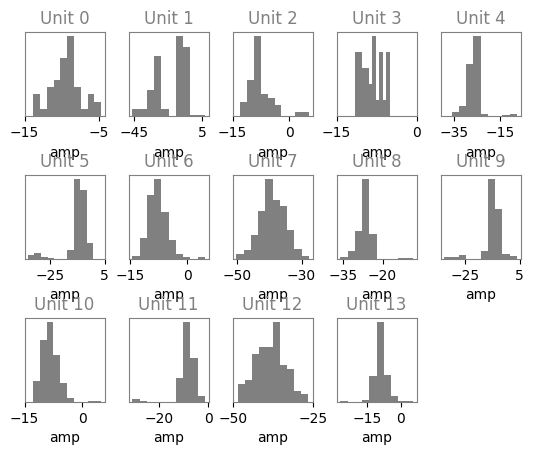

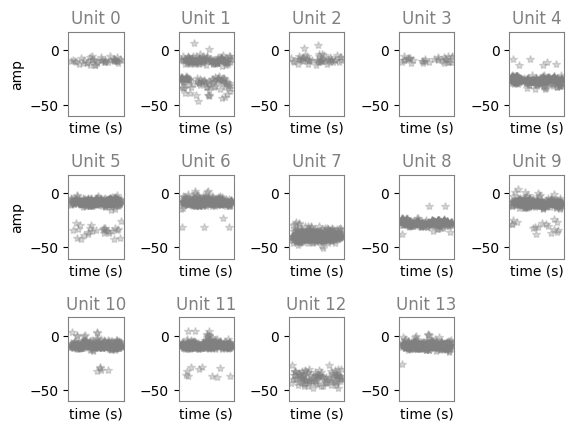

In [41]:
#import spikewidgets as sw

w_ts = sw.plot_timeseries(recording)
plt.show()
    #does not work w no geom:
    #w_el = sw.plot_electrode_geometry(recording)
    #pickle.dump(w_el, output, pickle.HIGHEST_PROTOCOL)
    
w_sp = sw.plot_spectrum(recording)
plt.show()
w_rs = sw.plot_rasters(sorting_true, sampling_frequency=fs)
plt.show()
w_isi = sw.plot_isi_distribution(sorting_true, sampling_frequency=fs, bins=10, window=1)
plt.show()
w_ach = sw.plot_autocorrelograms(sorting_true, sampling_frequency=fs, bin_size=1, window=10, unit_ids=[1, 2, 4, 5, 8, 10, 7])
plt.show()
w_cch = sw.plot_crosscorrelograms(sorting_true, sampling_frequency=fs, unit_ids=[1, 5, 8], bin_size=0.1, window=5)
plt.show()
w_wf = sw.plot_unit_waveforms(recording, sorting_true,unit_ids=sorting_true.get_unit_ids(),  max_spikes_per_unit=100)
plt.show()  
w_ampd = sw.plot_amplitudes_distribution(recording, sorting_true, max_spikes_per_unit=300)
plt.show()  
w_ampt = sw.plot_amplitudes_timeseries(recording, sorting_true, max_spikes_per_unit=300)
plt.show()   

In [42]:
# import matplotlib.pyplot as plt

# w_wf = sw.plot_unit_waveforms(recording, sorting_true,unit_ids=curated_units,max_channels=1,color='darkgreen', max_spikes_per_unit=300)#,figure=fig)#,axis=)

# plt.yticks(np.arange(-1.5, 2.0, 1))
# print("Each graph spans 3ms x axis. Y axis is microvolts -- the same as the amplitude distributions in the other graphs")
# w_wf = sw.plot_unit_waveforms(recording, sorting_true,unit_ids=[curated_units[1],curated_units[0]],max_channels=1,color='darkgreen', max_spikes_per_unit=300)#,figure=fig)#,axis=)

# plt.yticks(np.arange(-1.5, 2.0, 1))

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
from spiketoolkit import postprocessing as pp


wav = pp.get_unit_waveforms(recording, sorting_true,unit_ids=sorting_true.get_unit_ids(), ms_before=1, ms_after=2, recompute_info=True, save_property_or_features=False)

print(wav[0].shape)

#wav = pp.compute_unit_template_features(recording, sorting_true)



(42, 1, 43)


In [44]:
#plt.style.use('nature')

#unit = 0

units=wav[0].shape[1] #0 indexed
n_channels=1 #0 indexed?
n_timepoints=wav[0].shape[2] #all

#plt.plot(wav[n_spikes][n_channels][n_time_points])

for this_unit in sorting_true.get_unit_ids():
    #print("unit ",this_unit)
    for this_chan in range(0,n_channels):
        average = wav[this_unit][0][this_chan] * 0
        for thing in range(0,n_timepoints): #plot all occurences of unit n_spikes
            fig = plt.plot(wav[this_unit][thing][this_chan],'gray')
            average = average + wav[this_unit][thing][this_chan]
            the_title="Spike Detection on Unit ,"+str(this_unit)+", channel "+str(this_chan)
            plt.xlabel('3 milliseconds total')
            plt.ylabel('microvolts')
            plt.title(the_title)
        #average = wav[this_unit][thing][this_chan] * n_timepoints
        plt.plot(average/n_timepoints)
        plt.show()


IndexError: index 42 is out of bounds for axis 0 with size 42

# Remove Containers

In [ ]:
!sudo docker ps -a | grep Exit | cut -d ' ' -f 1 | xargs sudo docker rm